In [13]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn
!pip install wordcloud
!pip install nltk
!pip install matplotlib
!pip install Sastrawi
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.7 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

In [3]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Assuming the uploaded file is a CSV
  try:
    df_mitradaratrev = pd.read_csv(io.BytesIO(uploaded[fn]))
    print("Successfully loaded CSV into df_mitradaratrev")
  except pd.errors.ParserError:
      print(f"Error: Could not parse {fn} as a CSV. Please upload a valid CSV file.")
      df_mitradaratrev = pd.DataFrame() # Create an empty DataFrame if parsing fails
  except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_mitradaratrev = pd.DataFrame()

Saving df_mitradaratrev.csv to df_mitradaratrev.csv
User uploaded file "df_mitradaratrev.csv" with length 71029 bytes
Successfully loaded CSV into df_mitradaratrev


In [4]:
df_mitradaratrev

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,acc604c3-dd4e-49fe-8a59-8c1499e9ae70,Renoadhi T,https://play-lh.googleusercontent.com/a-/ALV-U...,Useful App for travelling. Helps me plan trips...,5,0,1.4.9,2025-09-06 12:18:54,NaN,NaN,1.4.9
1,4aeff7f0-0aab-4483-b215-ce4db280bd9c,Joel B. Z,https://play-lh.googleusercontent.com/a/ACg8oc...,skrg pengelola bus nya yg tolol. bus bisa sepi...,1,0,1.4.9,2025-09-06 09:51:49,NaN,NaN,1.4.9
2,e55068b5-017d-44ac-b74f-b5af9b0e5d63,Panji Rafi,https://play-lh.googleusercontent.com/a-/ALV-U...,Very good for tracking. Hopefully there's opti...,5,0,1.4.9,2025-09-06 00:16:01,NaN,NaN,1.4.9
3,68b49399-6194-4947-9e48-fbcc4e1ad459,Maulana Yusuf,https://play-lh.googleusercontent.com/a-/ALV-U...,one of the best dari aplikasi pemerintah,5,0,1.4.9,2025-08-31 01:53:56,NaN,NaN,1.4.9
4,8086420f-9f74-49c3-bb4d-ba06999a0e9c,Gabi,https://play-lh.googleusercontent.com/a-/ALV-U...,aplikasinya sering eror. busnya juga jadi keci...,3,0,1.4.9,2025-08-22 06:57:16,NaN,NaN,1.4.9
...,...,...,...,...,...,...,...,...,...,...,...
240,5c1409d8-3d14-4ae1-bea1-1e19221a2aa1,Achmad Maulana,https://play-lh.googleusercontent.com/a-/ALV-U...,sangat membantu sekali dalam pelayanan mudik g...,5,0,1.0.4,2023-03-13 01:34:35,NaN,NaN,1.0.4
241,993f12ed-c0da-4e72-8b7a-7f5592705e72,Saiful Anwar,https://play-lh.googleusercontent.com/a-/ALV-U...,"Tidak bisa login, request time out",1,3,1.0.4,2023-03-12 16:06:55,Mohon maaf kami sedang melakukan peningkatan l...,2023-03-12 23:18:16,1.0.4
242,e1992314-2d1b-475e-9a11-0821d79cdbcc,Reynaldo,https://play-lh.googleusercontent.com/a-/ALV-U...,keren UI nya,5,2,NaN,2023-03-05 10:23:32,NaN,NaN,NaN
243,e12650d9-17e8-41ed-9f53-8a772207fb13,Ira Debrina,https://play-lh.googleusercontent.com/a-/ALV-U...,Inovatif,5,2,1.0.0,2023-03-03 06:39:09,NaN,NaN,1.0.0


In [5]:
df_mitradaratrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              245 non-null    object
 1   userName              245 non-null    object
 2   userImage             245 non-null    object
 3   content               245 non-null    object
 4   score                 245 non-null    int64 
 5   thumbsUpCount         245 non-null    int64 
 6   reviewCreatedVersion  216 non-null    object
 7   at                    245 non-null    object
 8   replyContent          33 non-null     object
 9   repliedAt             33 non-null     object
 10  appVersion            216 non-null    object
dtypes: int64(2), object(9)
memory usage: 21.2+ KB


In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download Indonesian stopwords if not available
nltk.download('stopwords')
indonesian_stopwords = set(stopwords.words('indonesian'))

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_mitradaratrev[text_column].dropna().astype(str))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
df_mitradaratrev.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,Useful App for travelling. Helps me plan trips...,5,0,1.4.9,2025-09-06 12:18:54,NaN,NaN
1,skrg pengelola bus nya yg tolol. bus bisa sepi...,1,0,1.4.9,2025-09-06 09:51:49,NaN,NaN
2,Very good for tracking. Hopefully there's opti...,5,0,1.4.9,2025-09-06 00:16:01,NaN,NaN
3,one of the best dari aplikasi pemerintah,5,0,1.4.9,2025-08-31 01:53:56,NaN,NaN
4,aplikasinya sering eror. busnya juga jadi keci...,3,0,1.4.9,2025-08-22 06:57:16,NaN,NaN
...,...,...,...,...,...,...,...
240,sangat membantu sekali dalam pelayanan mudik g...,5,0,1.0.4,2023-03-13 01:34:35,NaN,NaN
241,"Tidak bisa login, request time out",1,3,1.0.4,2023-03-12 16:06:55,Mohon maaf kami sedang melakukan peningkatan l...,2023-03-12 23:18:16
242,keren UI nya,5,2,NaN,2023-03-05 10:23:32,NaN,NaN
243,Inovatif,5,2,1.0.0,2023-03-03 06:39:09,NaN,NaN


##Stopwords Removal
Indonesian Stopwords

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
print(len(indonesian_stopwords))

758


,Word,Frequency
0,bus,92
1,aplikasi,52
2,bantu,32
3,nya,27
4,gak,27
...,...,...
95,pas,4
96,mukti,4
97,integrasi,4
98,udh,4


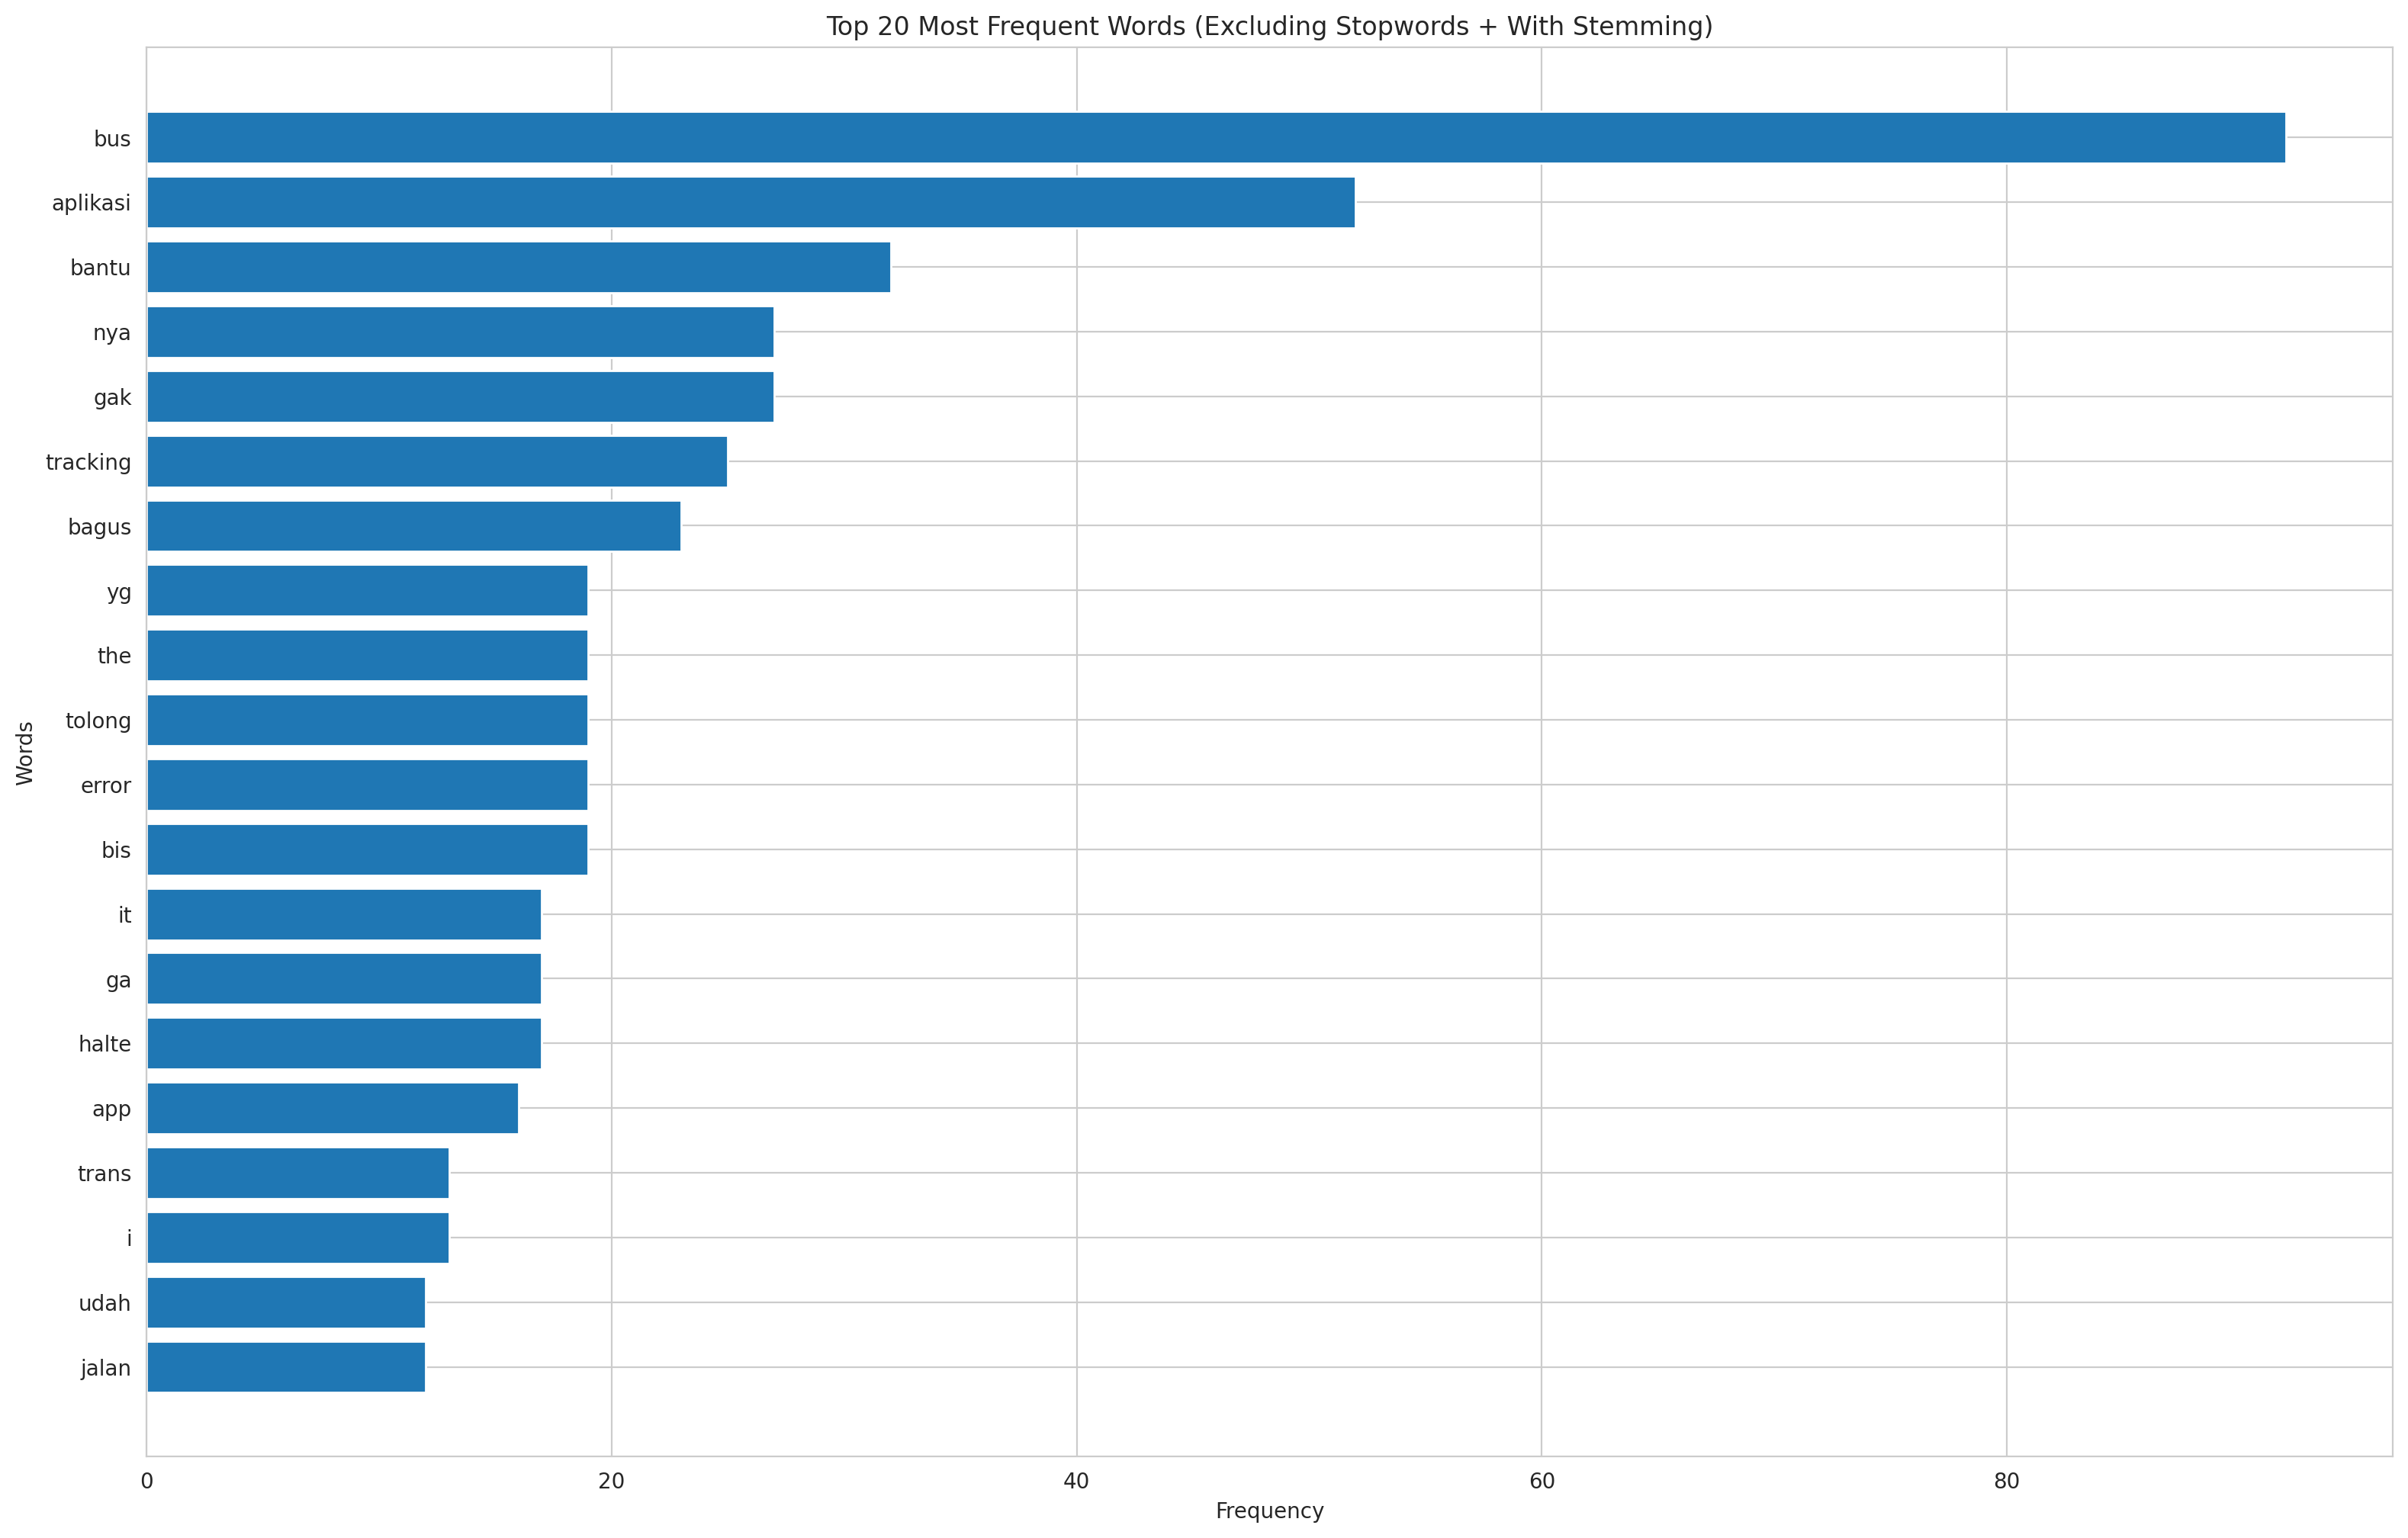

In [16]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Ganti sesuai nama kolom teks

# Gabungkan semua teks jadi satu string
all_text = ' '.join(df_mitradaratrev[text_column].dropna().astype(str))

# Tokenisasi kata dengan regex (lebih rapi, otomatis buang tanda baca)
words = re.findall(r'\w+', all_text.lower())

# Hapus angka
words = [w for w in words if not w.isnumeric()]

# Inisialisasi Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Stopwords Indonesia (kalau belum ada bisa download lewat nltk atau list custom)
# Misalnya: indonesian_stopwords = stopwords.words('indonesian')

# Hapus stopwords + lakukan stemming
filtered_words = [
    stemmer.stem(word)
    for word in words
    if word not in indonesian_stopwords
]

# Hitung frekuensi kata
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(100)

# Konversi ke DataFrame untuk visualisasi
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Tampilkan tabel kata paling sering
display(word_freq_df)

# Plot kata paling sering
plt.figure(figsize=(19, 12))
plt.barh(word_freq_df['Word'][:20][::-1], word_freq_df['Frequency'][:20][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Frequent Words (Excluding Stopwords + With Stemming)")
plt.show()

In [17]:
common_words

[('bus', 92),
 ('aplikasi', 52),
 ('bantu', 32),
 ('nya', 27),
 ('gak', 27),
 ('tracking', 25),
 ('bagus', 23),
 ('yg', 19),
 ('the', 19),
 ('tolong', 19),
 ('error', 19),
 ('bis', 19),
 ('it', 17),
 ('ga', 17),
 ('halte', 17),
 ('app', 16),
 ('trans', 13),
 ('i', 13),
 ('udah', 12),
 ('jalan', 12),
 ('mudik', 12),
 ('to', 11),
 ('login', 11),
 ('and', 11),
 ('ya', 11),
 ('gratis', 11),
 ('a', 10),
 ('in', 10),
 ('posisi', 10),
 ('akurat', 10),
 ('live', 10),
 ('fitur', 10),
 ('rute', 10),
 ('kasih', 10),
 ('jam', 10),
 ('for', 9),
 ('good', 9),
 ('guna', 9),
 ('baik', 9),
 ('kali', 9),
 ('keren', 9),
 ('titik', 9),
 ('update', 9),
 ('banget', 9),
 ('tiket', 9),
 ('mudah', 9),
 ('warna', 9),
 ('very', 8),
 ('this', 8),
 ('biskita', 8),
 ('buka', 8),
 ('moga', 8),
 ('pakai', 8),
 ('tunggu', 8),
 ('kadang', 7),
 ('mantap', 7),
 ('sesuai', 7),
 ('bandung', 7),
 ('please', 7),
 ('salah', 7),
 ('aja', 7),
 ('muncul', 7),
 ('terima', 7),
 ('masuk', 7),
 ('s', 6),
 ('lot', 6),
 ('of', 6),
 ('